In [24]:
%load_ext autoreload
%autoreload 2

In [88]:
from hfgtools import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
inpath = r'T:\DCProjects\Support\Lane\HfG\DataFromThem'

In [5]:
# oa - online applications
oa = pd.read_csv(inpath + '\\OnlineApplications.csv')

In [26]:
oa.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail'],
      dtype='object')

In [32]:
oa['Age'] = oa['DOB'].apply(lambda x: calculate_age(x))

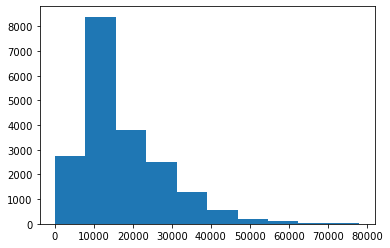

In [214]:
plt.hist(oa.loc[(oa.IncomeAnnual != 0) & (oa.IncomeAnnual < 80000), 'IncomeAnnual']);

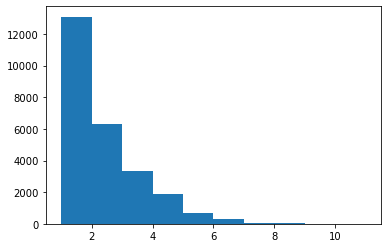

In [221]:
plt.hist(x=oa['HouseholdSize']);

In [229]:
len(oa.LegalState.value_counts().index)

44

In [226]:
oa.LegalZIP.value_counts()

97402    7181
97401    3493
97477    3416
97478    1782
97404    1608
         ... 
97462       1
85225       1
44052       1
30014       1
7104        1
Name: LegalZIP, Length: 548, dtype: int64

In [225]:
oa.HouseholdMinors.value_counts()

0    16426
1     4624
2     2868
3     1261
4      336
5      163
6       22
7        9
8        5
9        4
Name: HouseholdMinors, dtype: int64

In [224]:
oa.EmancipatedMinor.value_counts()

0    25710
1        8
Name: EmancipatedMinor, dtype: int64

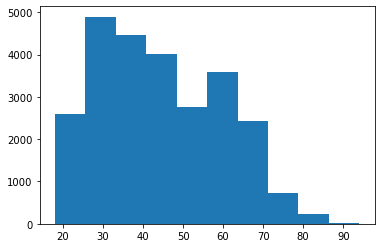

In [215]:
plt.hist(x=oa['Age']);

In [199]:
oa['Age'].value_counts()

35    760
38    740
28    684
36    667
33    656
     ... 
88      7
87      6
85      4
94      3
93      1
Name: Age, Length: 73, dtype: int64

In [197]:
oa['Language'].value_counts()

eng    25683
spa       35
Name: Language, dtype: int64

In [159]:
oa.shape

(25718, 56)

In [158]:
len(oa.KeyApplication.unique())

25718

In [37]:
oa.loc[oa.KeyApplication==5419013, ['LegalAddress1','LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4']]

,LegalAddress1,LegalAddress2,LegalCity,LegalState,LegalZIP,LegalZIP4
0,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,2063.0


In [36]:
oa.loc[oa.KeyApplication==5419013, ['HouseholdSize', 'HouseholdMinors', 'PreviousAgencyID', 'Citizenship']]

,HouseholdSize,HouseholdMinors,PreviousAgencyID,Citizenship
0,3,1,NaN,EC


In [8]:
os.listdir(inpath)

['ApplicantIncome.csv',
 'ApplicationContacts.csv',
 'ApplicationMembers.csv',
 'ApplicationQuestionHistory.csv',
 'Codes added via KEY LCOG WaitlistConnect2022_Draft_D20221201 (003).xlsx',
 'Dashboard visual with RA Added.pptx',
 'HowDidYouHear.xlsx',
 'OnlineApplications.csv']

In [9]:
# applicant income
ai = pd.read_csv(inpath + '\\ApplicantIncome.csv')

In [27]:
ai.loc[ai.KeyApplication==5419013, ['KeyIncome', 'Amount', 'HowOften']]

,KeyIncome,Amount,HowOften
0,6471877,3500.0,Monthly


In [28]:
3500*12

42000

In [10]:
# application contacts
ac = pd.read_csv(inpath + '\\ApplicationContacts.csv')

In [238]:
ac.head(3)

,KeyContact,KeyApplication,Name,StreetAddress,City,State,ZIP,PhoneNumber,CellNumber,Email,...,ReasonTermination,ReasonEviction,ReasonLatePayment,ReasonRecertification,ReasonChangeInLeaseTerms,ReasonChangeInHouseRules,ReasonOther,ReasonOtherDetail,TSModified,TSCreated
0,786912,5419064,Carol Post,1367 Brookhaven Circle,Toccoa,GA,30577,(706) 779-3359,NaN,cpost@bellsouth.net,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:10:03,2022-07-26 12:10:03
1,786916,5419158,GIANNA N SANDERS,1642 Water St,Springfield,OR,97477,(541) 228-2001,NaN,hellsangel459335@msn.com,...,0,0,0,0,0,0,1,For any help or if you cannot reach me,2022-07-26 12:13:15,2022-07-26 12:13:15
2,786917,5419159,Carl Davis,318 Grizzly Ave,Eugene,OR,97404,(503) 741-9768,(503) 741-9768,cdavisii@gmail.com,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:13:17,2022-07-26 12:13:17


In [17]:
ac.columns

Index(['KeyContact', 'KeyApplication', 'Name', 'StreetAddress', 'City',
       'State', 'ZIP', 'PhoneNumber', 'CellNumber', 'Email', 'Relationship',
       'ReasonEmergency', 'ReasonUnableToContact', 'ReasonTermination',
       'ReasonEviction', 'ReasonLatePayment', 'ReasonRecertification',
       'ReasonChangeInLeaseTerms', 'ReasonChangeInHouseRules', 'ReasonOther',
       'ReasonOtherDetail', 'TSModified', 'TSCreated'],
      dtype='object')

In [30]:
ac.loc[ac.KeyApplication==5419013, 'Name']

Series([], Name: Name, dtype: object)

In [11]:
# application members
am = pd.read_csv(inpath + '\\ApplicationMembers.csv')

In [19]:
am.columns

Index(['KeyMember', 'KeyApplication', 'NameLast', 'NameMiddle', 'NameFirst',
       'SSN', 'DOB', 'Sex', 'Disabled', 'Relationship', 'Citizenship', 'Race',
       'Ethnicity'],
      dtype='object')

In [189]:
am['Age'] = am['DOB'].apply(lambda x: calculate_age(x))

In [192]:
am['Age'].value_counts()

1     1299
4     1276
2     1258
3     1122
6     1119
      ... 
88       9
87       6
85       4
94       3
93       1
Name: Age, Length: 91, dtype: int64

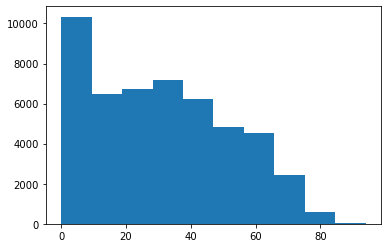

In [218]:
plt.hist(x=am['Age']);

In [193]:
am['Sex'].value_counts()

F    29022
M    20355
Name: Sex, dtype: int64

In [194]:
am['Disabled'].value_counts()

0    34796
1    14581
Name: Disabled, dtype: int64

In [195]:
am['Race'].value_counts()

1            36615
2             3140
6             2807
3             1462
1,3            991
             ...  
1,4g,6           1
3,1,2            1
1,2,4b           1
1,2,3,5,6        1
4,1,2,6          1
Name: Race, Length: 131, dtype: int64

In [196]:
am['Ethnicity'].value_counts()

0    42013
1     7364
Name: Ethnicity, dtype: int64

In [185]:
datetime.strptime(am.DOB.values[0], '%Y-%m-%d')

datetime.datetime(1988, 12, 4, 0, 0)

In [141]:
am.Citizenship.unique()

array(['EC', 'EN', 'IN', 'PV', 'IC', 'ND', nan], dtype=object)

In [33]:
# application question history
aqh = pd.read_csv(inpath + '\\ApplicationQuestionHistory.csv')

In [21]:
aqh.columns

Index(['QuestionID', 'KeyApplication', 'Question', 'Preference', 'Answer',
       'Response', 'TSModified', 'TSCreated'],
      dtype='object')

In [161]:
len(aqh.KeyApplication.unique())

25718

In [34]:
howheard = aqh[aqh.Preference=='P9']

In [175]:
howheard.Answer.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
howheard.loc[:,'Response'] = howheard.copy()['Response'].str.capitalize()

In [38]:
howheard.Response.value_counts()

Email                                      2757
Friend                                     2306
Facebook                                   1148
Family                                     1092
Case manager                                800
                                           ... 
Ive been receving emails                      1
I got a message alert sent to my phone.       1
Sibling                                       1
Willamette families                           1
Beth johnson                                  1
Name: Response, Length: 2958, dtype: int64

In [172]:
hhout = howheard.Response.value_counts().rename_axis('how').reset_index(name='counts')

In [173]:
hhout.to_csv(r'T:\DCProjects\Support\Lane\HfG\how_heard.csv', index=False)

In [146]:
aqh.Preference.unique()

array(['P5', 'P7', 'P8', 'P9'], dtype=object)

In [143]:
aqh.Question.unique()

array(['Do you require a wheelchair accessible unit? This question is for data purposes only.',
       'Are you or anyone in your household currently homeless?  This includes currently living in a car, on the street, in an emergency shelter, transitional housing, or currently living in a friend or family members home, or couch surfing? If yes, where are you currently living?',
       'Did someone help you complete this application? If yes, then who?',
       'How did you hear about our wait list opening?  Please fill in the following box with an answer (Ex. Text message, email, Facebook, RegisterGuard, family/friend, etc.)'],
      dtype=object)

In [96]:
list(aqh.loc[(aqh.Preference=='P9') & (aqh.Answer=='Yes'), 'Response'].unique())

['Homes for Good email',
 'Email',
 'Email from Homes For Good Email Subscription',
 'Work force',
 'Homes For Good Email Subscription',
 'Family / Friend',
 'affordablehousingonline.com',
 'Lane workforce',
 'A reddit post in the Eugene subreddit.',
 'Friend',
 'Sister',
 'Facebook',
 'Have had rent help from home for goods and seen this was going to happen weeks ago so I set many alarms and reminders to make sure I could apply.',
 'Housing office at Cheshire Residential',
 'Website',
 'Family',
 'mom',
 'Email.',
 'Email, Disability Advocacy List',
 'Email to my mom',
 'counselor',
 'Willamette family',
 'Womenspace',
 'Treatment',
 'Online',
 'Email from Homes for Good',
 'friends',
 'Lane County',
 'Email notification from Homes For Good.',
 'family',
 'My homes for good worker',
 'Counselor for WF',
 'I received an email  we are currently living in a 2 bedroom unit at this complex paying a reduced market rate',
 'St. Vincent de Paul',
 'Homes for good',
 'Homes for Good website',


In [80]:
who.head(5)

,name,counts,General Name,Detailed Name
0,Catrina A,51,Unknown,Unknown
1,Thuy Detering,45,Community Member,Community Member
2,Gail Lewis,31,Community Organization,Senior Disability Service Staff
3,Suzanne Murphy,30,Community Member,Community Member
4,Christi Champ,27,Homes for Good Staff,Homes for Good Staff


In [89]:
df = reorganizeP8()

In [90]:
df.head(5)

,QuestionID,KeyApplication,Question,Preference,Answer,Response,TSModified,TSCreated,P8SCat,P8BCat
142,2083,5419133,Did someone help you complete this application...,P8,Yes,mom,2022-07-26 12:12:30,2022-07-26 12:12:30,family,Community Member
178,2083,5419158,Did someone help you complete this application...,P8,Yes,"My mom, Gianna Sanders",2022-07-26 12:13:15,2022-07-26 12:13:15,family,Community Member
206,2083,5419174,Did someone help you complete this application...,P8,Yes,Chris,2022-07-26 12:13:35,2022-07-26 12:13:35,unknown,Unknown
214,2083,5419180,Did someone help you complete this application...,P8,Yes,Tyla Johnson,2022-07-26 12:13:54,2022-07-26 12:13:54,family,Community Member
218,2083,5419182,Did someone help you complete this application...,P8,Yes,Mother,2022-07-26 12:13:57,2022-07-26 12:13:57,family,Community Member


In [91]:
df['P8BCat'].value_counts().rename_axis('who_helped').reset_index(name='counts')

,who_helped,counts
0,Community Organization,4003
1,Homes For Good,3151
2,Community Member,1657
3,Human Services Profession,1473
4,Housing Specialist,549
5,Unknown,60


In [93]:
df[df.P8SCat == "family"]["Response"].unique()

array(['mom', 'My mom, Gianna Sanders', 'Tyla Johnson', 'Mother',
       'Daughter. Difficulty filling out forms due to TBI.',
       'My mother, Gianna Sanders.',
       'my mom, because it takes me awhile to process things', 'My mom',
       'Mom', 'My mother', 'mother', 'Sabrina Myers, mother',
       'My son Jacob Matthews', 'Angela Anderson', 'Father',
       'My daughter', 'father', 'My son', 'my grandmother',
       'Kelly Bustamante-daughter',
       'my mom did because i have a hard time reading',
       'Tyla Johnson\nI want to explain that I am mentally disabled, I selected disability but it only covers, blind, deaf and another option.',
       'Daughter in Law', 'My daughter, Liana Parish', 'Daughter in law',
       'Sarah Wilson', 'My son & care provider.',
       'My sister (kaylen leaming) and grandma (Nancy leaming)',
       'My daughter Liana Parish', 'YES, MOM-CARETAKER-DSW',
       'mom-dsw-caretaker', 'mom-caretaker-dsw',
       'My sister (kaylen leaming) and my gr

In [72]:
out = df[df.P8BCat == "Unknown"]["Response"].value_counts().rename_axis('name').reset_index(name='counts')

In [73]:
out.to_csv(r'T:\DCProjects\Support\Lane\HfG\who_helped_others.csv', index=False)

In [138]:
sorted(list(df.loc[df.ResCat == "others", "Response"].unique()))

['07/26/2022',
 'Abby Olivera-Ruiz',
 'Aisha McCoy',
 'Albert Nash',
 'Alec Lively',
 'Alissa Moosbrugger',
 'Alvin Bradford',
 'Amanda',
 'Amanda Cowan',
 'Amanda Laufer',
 'Amanda Newman',
 'Amanda cowan',
 'Amelia Jans, CSWA - therapist',
 'Amie Holland',
 'Anabel Sanchez',
 'Angel Shaffer',
 'Angela Miller',
 'Angelica Talamante',
 'Anika Greene',
 'Anita Allen',
 'April Morales',
 'Ashely',
 'Ashley',
 'Ashley D',
 'Becky McNichols',
 'Belinda McClain',
 'Bobbi Bullock',
 'Brandy Teel',
 'Brenda',
 'Brenda Heth',
 'Brittany Cartwright',
 'Brittany Carwright',
 'CC',
 'Carl Davis',
 'Cassidy Cockle',
 'Cathleen Reyes',
 'Catrina A',
 'Catrina a',
 'Centro Latino pop up - Beatriz',
 'Chad Estrella',
 'Charles Clark',
 'Choice',
 'Chris',
 'Christi Champ',
 'Christine a counselor at  Serenity Lane',
 'Christy Waltz',
 'Chrystal Carreras',
 'Councilor Loraine moyer',
 'Councilor Lorane Moyer',
 'Counselor',
 'Courtney McCloskey - Resident  Services Specialist',
 'DSP Tammie Coltrane',

In [66]:
filtered_list = [item for item in agencies if not any(pattern in item for pattern in patterns + capitalized_patterns)] #re.search(pattern, item, re.IGNORECASE)
print(filtered_list)

['Chris', 'Lindsay Weiss Lane County', 'Shay Limbaugh', 'Claire Hutton \necobeanfabric@yahoo.com\n541-972-9288', 'Gail Reynolds', 'Carla Avila from Relief Nursery', 'Stacy Ivey', 'WILLAMETTE fAMILY', 'Claire Hutton ecobeanfabric@yahoo.com  541-972-9288', 'Case Manager', 'Stefanie- Homes For Good', 'Randy Layton', 'Stefanie @ Homes For Good', 'Peer support at WF', 'Claire Hutton.  ecobeanfabric@yahoo.com. 541-972-9288', 'Employee for ColumbiaCare services. Inc.', 'case manager', 'Margarita Chernova', 'Employee for ColumbiaCare Services Inc.', 'Homes For Good', 'Claire Hutton. ecobeanfabric@yahoo.com   541-972-9288', 'Shavaun Manibusan', 'Dee/case mgr LCBH', 'Case manager', 'Leticia Simmons \nCatholic community services', 'Andrew Ahrens - Lane County Dovetail Program Case Worker', 'Mary Hunter-caregiver', 'Holly Brunton-Sneden/Sunshine Care Environments.', 'Employee for ColumbiaCare Services Inc', 'Claire Hutton. ecobeanfabric@yahoo.com    541-972-9288', 'Laurel Hill Center Housing', 'Em

In [13]:
# how did you hear
hh = pd.read_excel(inpath + '\\HowDidYouHear.xlsx')

In [157]:
hh.ValueToConvertTo.value_counts()

Lane County                                     14
Homes for Good                                  13
State of Oregon                                  5
Looking Glass                                    2
St. Vincent de Paul                              2
                                                ..
Cornerstone Community Housing                    1
Family/Friends                                   1
TV News                                          1
Veterans Administration (VA)                     1
Springfield Eugene Tenant Association (SETA)     1
Name: ValueToConvertTo, Length: 95, dtype: int64